# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
   

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | qandala
Processing Record 3 of Set 1 | palmer
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | nadym
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | artyk
City not found. Skipping...
Processing Record 12 of Set 1 | atasu
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | omaha
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | namatanai
Processing Record 18 of Set 1 | brandfort
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | hambantota
P

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,87.76,81,83,8.01,EC,1680117030
1,qandala,11.4720,49.8728,83.57,74,10,5.68,SO,1680117030
2,palmer,42.1584,-72.3287,55.51,31,75,9.22,US,1680117030
3,victoria,22.2855,114.1577,71.20,91,100,8.99,HK,1680116777
4,nadym,65.5333,72.5167,5.07,93,96,18.92,RU,1680117030


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,87.76,81,83,8.01,EC,1680117030
1,qandala,11.4720,49.8728,83.57,74,10,5.68,SO,1680117030
2,palmer,42.1584,-72.3287,55.51,31,75,9.22,US,1680117030
3,victoria,22.2855,114.1577,71.20,91,100,8.99,HK,1680116777
4,nadym,65.5333,72.5167,5.07,93,96,18.92,RU,1680117030


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

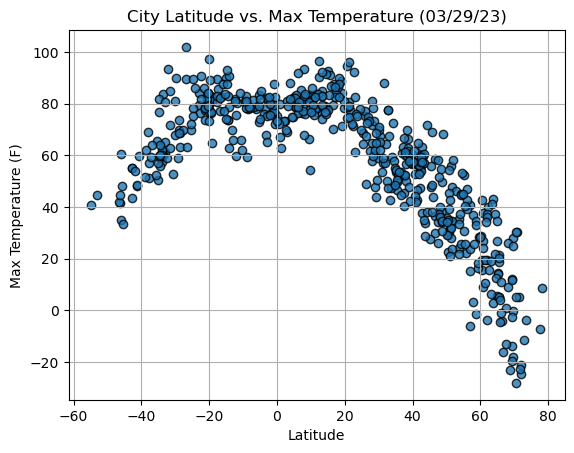

In [10]:
# Create a scatter plot to showcase the relationship between Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

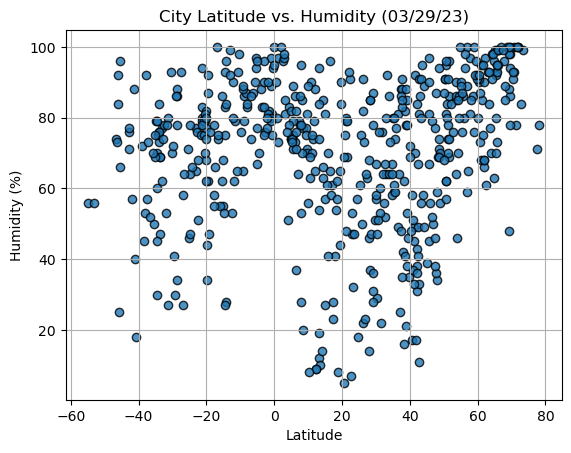

In [11]:
# Create a scatter plot to showcase the relationship between Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

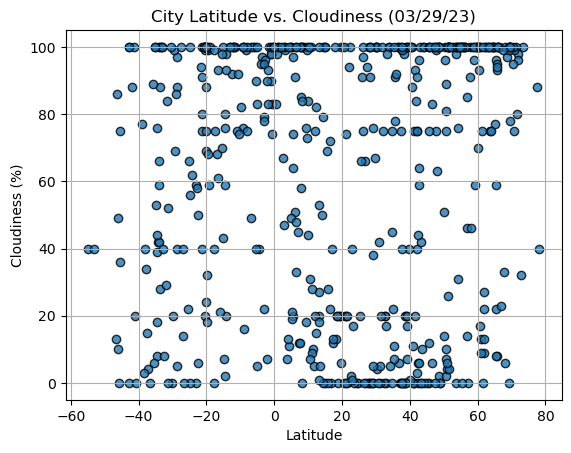

In [12]:
# Create a scatter plot to showcase the relationship between Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

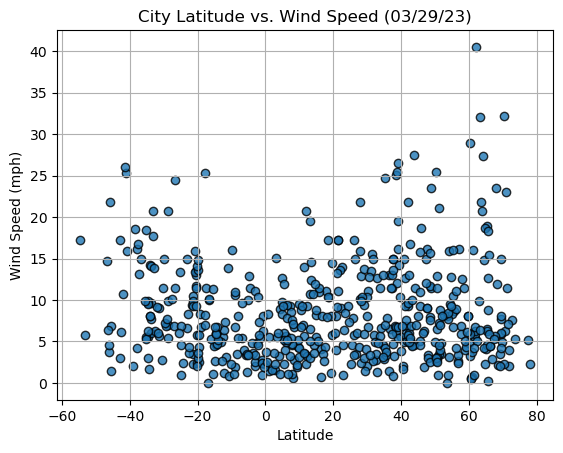

In [13]:
# Create a scatter plot to showcase the relationship between Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values,text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    print(f"The r-value is: {r_value}")

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qandala,11.4720,49.8728,83.57,74,10,5.68,SO,1680117030
2,palmer,42.1584,-72.3287,55.51,31,75,9.22,US,1680117030
3,victoria,22.2855,114.1577,71.20,91,100,8.99,HK,1680116777
4,nadym,65.5333,72.5167,5.07,93,96,18.92,RU,1680117030
5,guerrero negro,27.9769,-114.0611,64.94,46,0,15.90,MX,1680117031


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,87.76,81,83,8.01,EC,1680117030
7,bredasdorp,-34.5322,20.0403,58.96,70,39,5.59,ZA,1680117031
9,kruisfontein,-34.0033,24.7314,57.33,76,59,14.16,ZA,1680117031
12,vaini,-21.2000,-175.2000,73.56,94,40,2.30,TO,1680117031
13,namatanai,-3.6667,152.4333,78.39,83,97,3.60,PG,1680117031


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8864998187834178


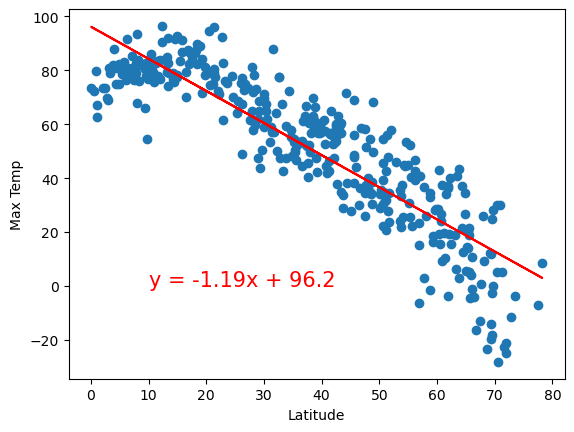

In [78]:
# Linear regression scatter plot for Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,(10,0))



The r-value is: 0.6394335708680496


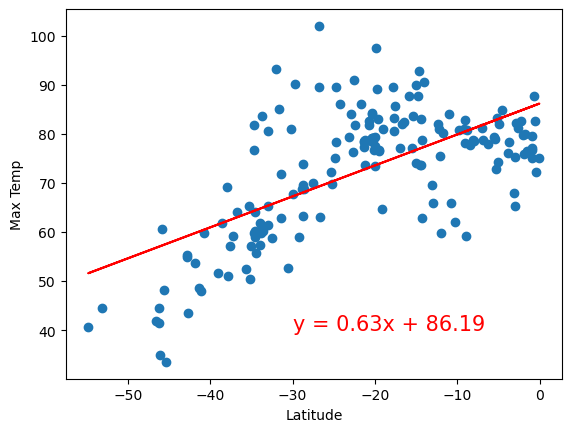

In [85]:
# Linear regression scatter plot for Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,(-30,40))

For both hemispheres, the temperature increases as the latitude approaches 0.
    

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.31613522441633135


Text(0, 0.5, 'Humidity')

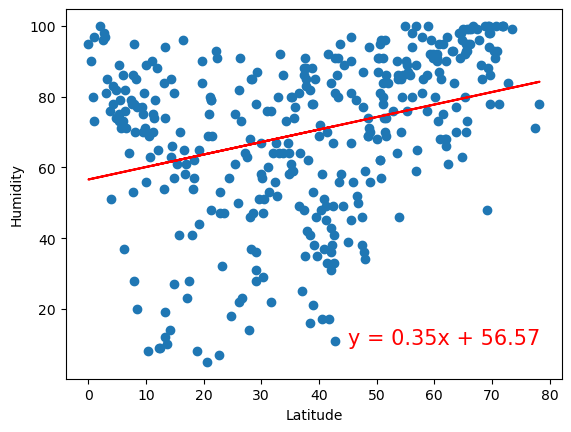

In [95]:
# Linear regression scatter plot for Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,(45,10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')


The r-value is: 0.37098699768153043


Text(0, 0.5, 'Humidity')

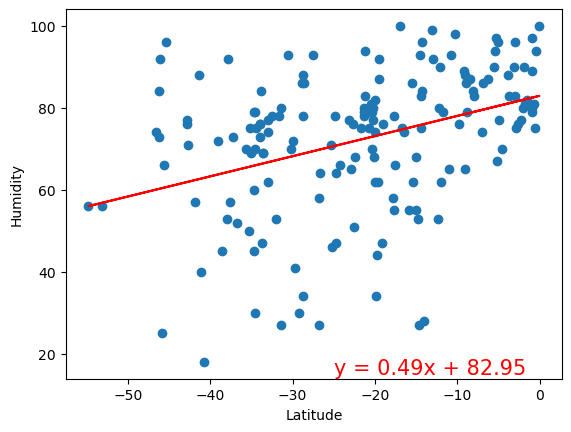

In [97]:
# Linear regression scatter plot for Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,(-25,15))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

There is a mild positive correlation between humidity and latitude. The humidity increases as the latitude approaches 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18753838771214043


Text(0, 0.5, 'Cloudiness')

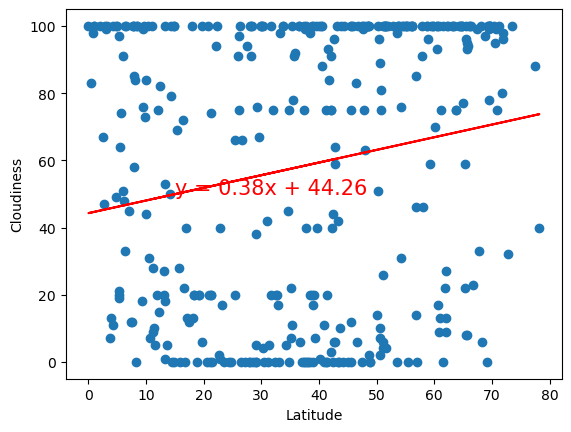

In [99]:
# Linear regression scatter plot for Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,(15,50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is: 0.36258923700282475


Text(0, 0.5, 'Cloudiness')

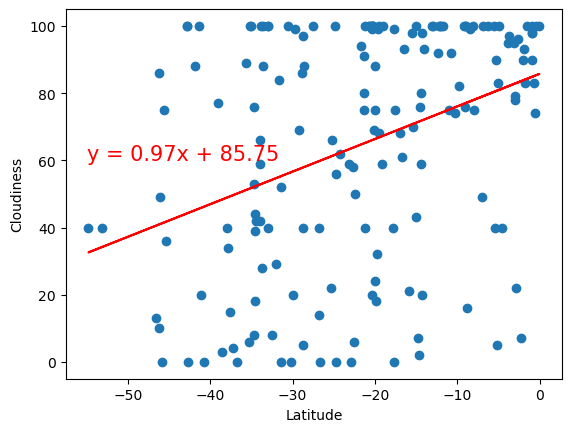

In [100]:
# Linear regression scatter plot for Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,(-55,60))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

There does not appear to be a correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1300439563285325


Text(0, 0.5, 'Wind Speed')

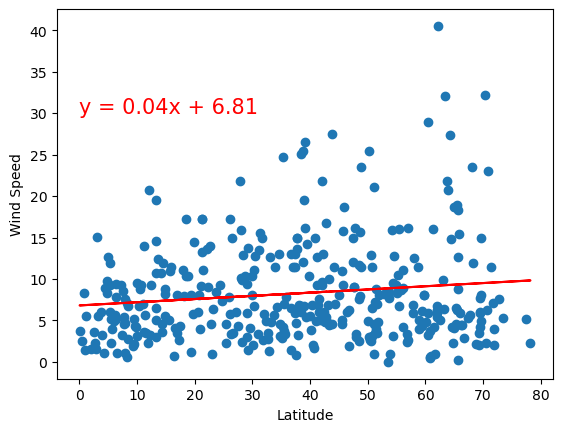

In [101]:
# Linear regression scatter plot for Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,(0,30))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r-value is: -0.37111605454189334


Text(0, 0.5, 'Wind Speed')

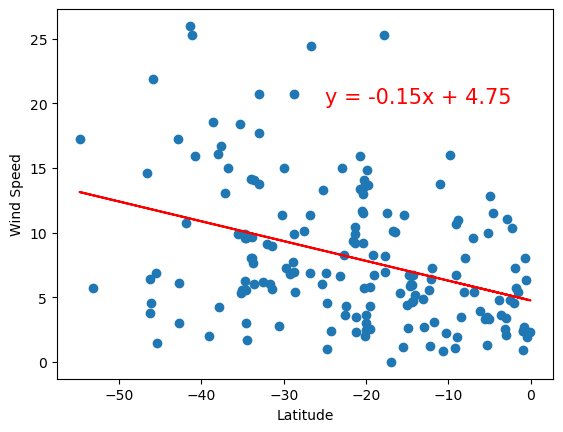

In [103]:
# Linear regression scatter plot for Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,(-25,20))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

There does not appear to be a correlation between wind speed and latitude.